In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [64]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]


In [65]:
X = make_hello(10000)

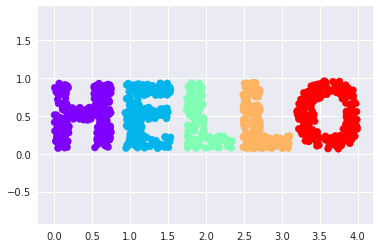

In [66]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [67]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T
XS = make_hello_s_curve(X)


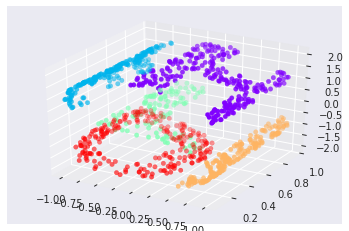

In [68]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

In [69]:
from sklearn.manifold import Isomap

In [70]:
aa = Isomap(n_neighbors=100)

In [71]:
aa.fit(XS)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=100, neighbors_algorithm='auto', path_method='auto', tol=0)

In [72]:
d=aa.transform(XS)

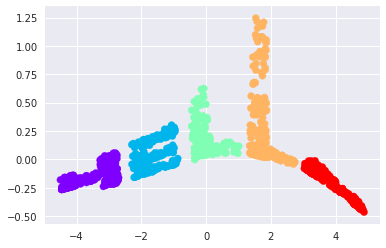

In [73]:
from mpl_toolkits import mplot3d
ax = plt.axes()
ax.scatter(d[:, 0], d[:, 1],
             **colorize);

#### sklearn PCA

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=2)

In [76]:
pca.fit(XS)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [77]:
d = pca.transform(XS)

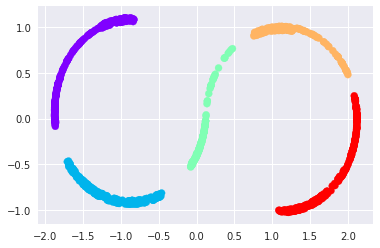

In [78]:
ax = plt.axes()
ax.scatter(d[:,0],d[:,1], **colorize);

#### Our PCA :B

In [79]:
import sys
sys.path.append('../dimred')
import pca

In [80]:
PCA = pca.PCA(n_component=2)

In [81]:
PCA.fit(XS)

In [82]:
d = PCA.transform(XS)

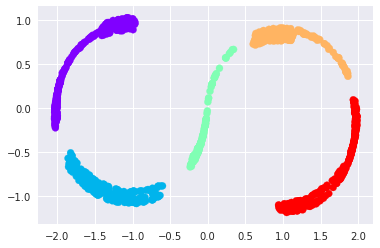

In [83]:
ax = plt.axes()
ax.scatter(d[:,0],d[:,1], **colorize);

#### sklearn random projection

In [84]:
from sklearn import random_projection

In [85]:
transformer = random_projection.SparseRandomProjection(n_components=2)

In [86]:
X_new = transformer.fit_transform(XS)

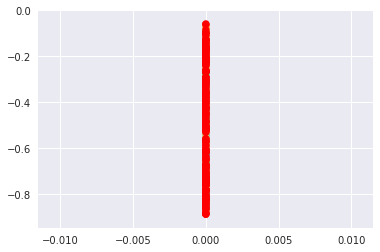

In [87]:
ax = plt.axes()
ax.scatter(X_new[:,0],X_new[:,1], **colorize);

#### our random projection

In [88]:
import random_projection

In [89]:
rproj = random_projection.RandomProjection(n_component=2)

In [90]:
rproj.fit(XS)

In [91]:
d = rproj.transform(XS)

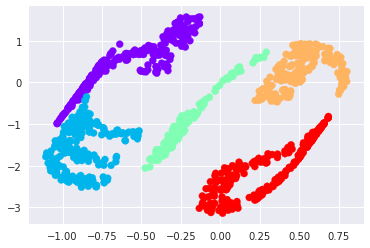

In [92]:
ax = plt.axes()
ax.scatter(d[:,0],d[:,1], **colorize);

#### Our Isomap

In [93]:
import isomap

In [94]:
Isomap = isomap.IsoMap(n_component=2, n_neighbour=50)

In [95]:
Isomap.fit(XS)

In [96]:
d = Isomap.transform(XS)

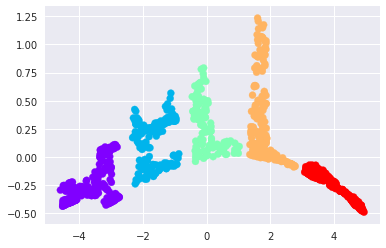

In [97]:
ax = plt.axes()
ax.scatter(d[:,0],d[:,1], **colorize);

## LLE

In [98]:
from sklearn.manifold import LocallyLinearEmbedding

In [99]:
lle = LocallyLinearEmbedding(n_neighbors= 100, n_components= 2, method='hessian')

In [100]:
X_new = lle.fit_transform(XS)

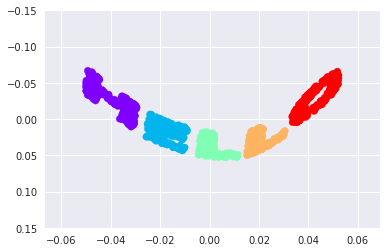

In [101]:

fig, ax = plt.subplots()
ax.scatter(X_new[:, 0], X_new[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

In [102]:
from sklearn.manifold import SpectralEmbedding

In [103]:
lap = SpectralEmbedding(n_neighbors= 300, affinity='nearest_neighbors', n_components=2 )

In [104]:
X_new = lap.fit_transform(XS)

In [105]:
X_new.shape

(1000, 2)

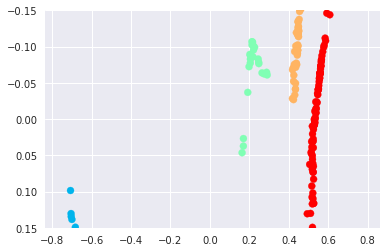

In [106]:
fig, ax = plt.subplots()
ax.scatter(X_new[:, 0], X_new[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

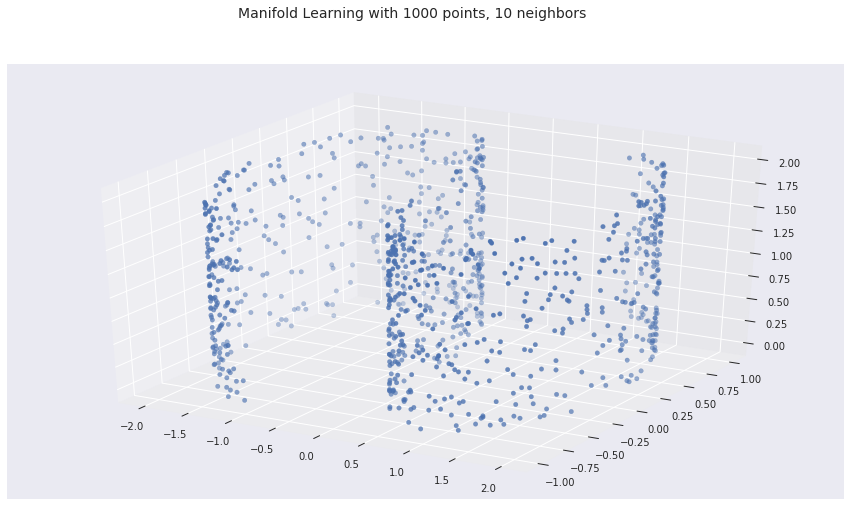

In [107]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 2], X[:, 0], X[:, 1],
             );

In [108]:
Y = lap.fit_transform(X)

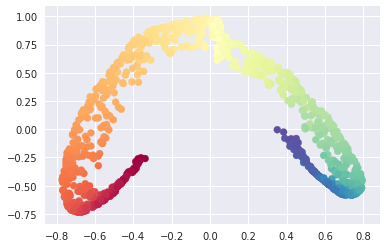

In [109]:
 plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
